In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
movies = pd.read_csv("ml-20m/movies.csv")

In [7]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [8]:
ratings = pd.read_csv("ml-20m/ratings.csv")[['movieId', 'rating']]

In [9]:
ratings.head()

movieId  rating
0        2     3.5
1       29     3.5
2       32     3.5
3       47     3.5
4       50     3.5

In [10]:
genome_scores = pd.read_csv("ml-20m/genome-scores.csv")

In [11]:
genome_scores.head()

movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02500
2        1      3    0.05775
3        1      4    0.09675
4        1      5    0.14675

In [12]:
genome_tags = pd.read_csv("ml-20m/genome-tags.csv")

In [13]:
genome_tags.head()

tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s

In [14]:
imdb_links = pd.read_csv("ml-20m/links.csv")

In [15]:
youtube_links = pd.read_csv("ml-20m/ml-youtube.csv")

In [16]:
links = pd.merge(imdb_links, youtube_links, on='movieId', how='left')[['movieId', 'imdbId', 'youtubeId', 'tmdbId']]

In [17]:
links.head()

movieId  imdbId    youtubeId   tmdbId
0        1  114709  K26_sDKnvMU    862.0
1        2  113497  3LPANjHlPxo   8844.0
2        3  113228  rEnOoWs3FuA  15602.0
3        4  114885  j9xml1CxgXI  31357.0
4        5  113041  ltwvKLnj1B4  11862.0

In [18]:
movie_tags = pd.merge(genome_scores, genome_tags, on='tagId')[['movieId', 'tag', 'relevance']]

In [19]:
movie_tags.head()

movieId  tag  relevance
0        1  007    0.02500
1        2  007    0.03975
2        3  007    0.04350
3        4  007    0.03725
4        5  007    0.04200

In [20]:
table = genome_scores[:].pivot_table(values='relevance', index='movieId', columns='tagId')

In [21]:
table.head()

tagId       1        2        3        4        5        6        7     \
movieId                                                                  
1        0.02500  0.02500  0.05775  0.09675  0.14675  0.21700  0.06700   
2        0.03975  0.04375  0.03775  0.04800  0.11025  0.07250  0.04775   
3        0.04350  0.05475  0.02800  0.07700  0.05400  0.06850  0.05600   
4        0.03725  0.03950  0.03675  0.03100  0.06825  0.04050  0.02325   
5        0.04200  0.05275  0.05925  0.03675  0.07525  0.12525  0.02850   

tagId       8        9        10    ...     1119     1120     1121     1122  \
movieId                             ...                                       
1        0.26275  0.26200  0.03200  ...  0.03950  0.01800  0.04575  0.03275   
2        0.10975  0.09925  0.02050  ...  0.04175  0.01925  0.01725  0.02425   
3        0.18500  0.04925  0.02675  ...  0.04150  0.02675  0.02775  0.03425   
4        0.08700  0.05125  0.03025  ...  0.05750  0.03375  0.02275  0.03975   
5        0.08500  0.02950  0.02875  ...  0.04250  0.02825  0.02150  0.02600   

tagId       1123     1124     1125     1126     1127     1128  
movieId                                                        
1        0.12500  0.04150  0.01925  0.03625  0.07775  0.02300  
2        0.12550  0.02250  0.01550  0.01475  0.09025  0.01875  
3        0.15550  0.03675  0.01700  0.01950  0.09700  0.01850  
4        0.18525  0.05925  0.01500  0.01525  0.06450  0.01300  
5        0.14275  0.02075  0.01650  0.01675  0.10750  0.01825  

[5 rows x 1128 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A6AAA8FCC0>]],
      dtype=object)

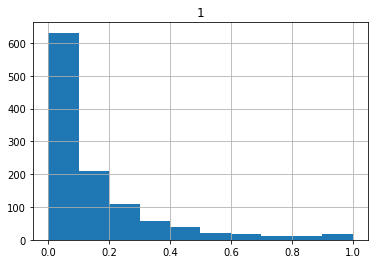

In [22]:
table[:1].T.hist()

In [23]:
movie_tags = genome_scores[genome_scores.relevance > 0.3][['movieId', 'tagId']]

In [24]:
movie_tags = pd.merge(movie_tags, genome_tags, on='tagId', how='left')[['movieId', 'tagId']]

In [25]:
movie_tags.head(5)

movieId  tagId
0        1     11
1        1     19
2        1     21
3        1     29
4        1     30

In [26]:
movie_tags['tagId'] = movie_tags.tagId.astype(str)

In [27]:
def concatenate_tags(tags):
    tags_as_str = ' '.join(set(tags))
    return tags_as_str

In [28]:
tags_per_movie = movie_tags.groupby('movieId')['tagId'].agg({
    'movie_tags': concatenate_tags
}).reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [29]:
tags_per_movie.head()

movieId                                         movie_tags
0        1  61 365 921 505 719 323 535 497 881 372 193 472...
1        2  61 719 919 1076 1028 497 132 881 193 367 1026 ...
2        3  863 374 299 469 1070 505 919 203 277 915 403 9...
3        4  863 374 201 613 299 97 107 396 1070 602 828 61...
4        5  505 919 323 1033 497 132 902 1026 157 992 451 ...

In [30]:
avg_ratings = ratings.groupby('movieId')['rating'].agg({
    'rating_mean': 'mean',
    'rating_median': 'median',
    'num_ratings': 'size'
}).reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


In [31]:
avg_ratings.head()

movieId  rating_mean  rating_median  num_ratings
0        1     3.921240            4.0        49695
1        2     3.211977            3.0        22243
2        3     3.151040            3.0        12735
3        4     2.861393            3.0         2756
4        5     3.064592            3.0        12161

In [32]:
dataset = pd.merge(movies, avg_ratings, on='movieId', how='left')

In [33]:
dataset = pd.merge(dataset, tags_per_movie, on='movieId', how='left')

In [34]:
dataset.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  rating_mean  rating_median  \
0  Adventure|Animation|Children|Comedy|Fantasy     3.921240            4.0   
1                   Adventure|Children|Fantasy     3.211977            3.0   
2                               Comedy|Romance     3.151040            3.0   
3                         Comedy|Drama|Romance     2.861393            3.0   
4                                       Comedy     3.064592            3.0   

   num_ratings                                         movie_tags  
0      49695.0  61 365 921 505 719 323 535 497 881 372 193 472...  
1      22243.0  61 719 919 1076 1028 497 132 881 193 367 1026 ...  
2      12735.0  863 374 299 469 1070 505 919 203 277 915 403 9...  
3       2756.0  863 374 201 613 299 97 107 396 1070 602 828 61...  
4      12161.0  505 919 323 1033 497 132 902 1026 157 992 451 ...

In [35]:
dataset[dataset.movie_tags.isnull()].head()

movieId                                              title  \
50        51                              Guardian Angel (1994)   
107      109                Headless Body in Topless Bar (1995)   
113      115  Happiness Is in the Field (Bonheur est dans le...   
122      124     Star Maker, The (Uomo delle stelle, L') (1995)   
125      127  Silences of the Palace, The (Saimt el Qusur) (...   

                    genres  rating_mean  rating_median  num_ratings movie_tags  
50   Action|Drama|Thriller     2.555556           3.00         27.0        NaN  
107  Comedy|Drama|Thriller     2.062500           1.75         16.0        NaN  
113                 Comedy     3.407895           4.00         38.0        NaN  
122                  Drama     3.498433           4.00        319.0        NaN  
125                  Drama     3.256098           3.00         41.0        NaN

In [36]:
dataset[dataset.rating_mean.isnull()].head()

movieId                            title  \
8555    26018    Chase a Crooked Shadow (1958)   
8933    26580         Park Is Mine, The (1986)   
9249    27249  Trumpet of the Swan, The (2001)   
9315    27396       Gentleman's Game, A (2002)   
9770    31797             White Banners (1938)   

                                genres  rating_mean  rating_median  \
8555  Crime|Film-Noir|Mystery|Thriller          NaN            NaN   
8933             Action|Drama|Thriller          NaN            NaN   
9249           Animation|Drama|Musical          NaN            NaN   
9315                             Drama          NaN            NaN   
9770                             Drama          NaN            NaN   

      num_ratings movie_tags  
8555          NaN        NaN  
8933          NaN        NaN  
9249          NaN        NaN  
9315          NaN        NaN  
9770          NaN        NaN

In [37]:
dataset_with_tags = dataset[~dataset.movie_tags.isnull()].reset_index(drop=True)

# Count Vectorizer

In [38]:
c_vectorizer = CountVectorizer()

In [39]:
c_vectorized = c_vectorizer.fit_transform(dataset_with_tags.movie_tags)

In [40]:
c_vectorized_m2m = pd.DataFrame(cosine_similarity(c_vectorized))

In [41]:
c_vectorized_m2m.head(10)

0         1         2         3         4         5         6      \
0  1.000000  0.524981  0.346501  0.277201  0.361600  0.440813  0.372558   
1  0.524981  1.000000  0.301726  0.264010  0.395118  0.251902  0.315404   
2  0.346501  0.301726  1.000000  0.421053  0.566282  0.253879  0.534456   
3  0.277201  0.264010  0.421053  1.000000  0.402358  0.224585  0.518737   
4  0.361600  0.395118  0.566282  0.402358  1.000000  0.157591  0.574150   
5  0.440813  0.251902  0.253879  0.224585  0.157591  1.000000  0.218727   
6  0.372558  0.315404  0.534456  0.518737  0.574150  0.218727  1.000000   
7  0.379545  0.456612  0.407096  0.424795  0.345796  0.236433  0.348899   
8  0.211700  0.353730  0.236940  0.217195  0.251577  0.263752  0.194606   
9  0.383426  0.457693  0.380504  0.244609  0.311665  0.355490  0.292227   

      7         8         9      ...     10371     10372     10373     10374  \
0  0.379545  0.211700  0.383426  ...  0.422813  0.370205  0.228502  0.328025   
1  0.456612  0.353730  0.457693  ...  0.393106  0.397793  0.300919  0.387492   
2  0.407096  0.236940  0.380504  ...  0.401394  0.285967  0.269953  0.297406   
3  0.424795  0.217195  0.244609  ...  0.401394  0.319610  0.269953  0.270369   
4  0.345796  0.251577  0.311665  ...  0.477334  0.414370  0.229304  0.287072   
5  0.236433  0.263752  0.355490  ...  0.215961  0.234064  0.208681  0.346109   
6  0.348899  0.194606  0.292227  ...  0.455556  0.301443  0.228440  0.218026   
7  1.000000  0.338648  0.383886  ...  0.323970  0.322451  0.317744  0.395520   
8  0.338648  1.000000  0.443537  ...  0.225877  0.265049  0.253185  0.410792   
9  0.383886  0.443537  1.000000  ...  0.279827  0.299689  0.290423  0.450268   

      10375     10376     10377     10378     10379     10380  
0  0.518853  0.138795  0.278589  0.276940  0.332991  0.381005  
1  0.473573  0.264381  0.250233  0.226892  0.158573  0.354357  
2  0.430997  0.172172  0.240824  0.364117  0.263435  0.304307  
3  0.387897  0.196768  0.276948  0.253299  0.284510  0.275778  
4  0.463725  0.125354  0.225018  0.282395  0.214817  0.306951  
5  0.223893  0.219034  0.361903  0.229095  0.451599  0.370500  
6  0.411919  0.176304  0.334457  0.212771  0.283246  0.306741  
7  0.449323  0.322590  0.242965  0.271523  0.223253  0.287824  
8  0.242536  0.442909  0.149071  0.160357  0.130454  0.181946  
9  0.311592  0.285779  0.233177  0.245256  0.228543  0.309376  

[10 rows x 10381 columns]

In [42]:
c_vectorized_m2m_similarity = c_vectorized_m2m.stack().reset_index()

In [43]:
c_vectorized_m2m_similarity.columns = ['first_movie', 'second_movie', 'similarity_score']

In [44]:
c_vectorized_m2m_similarity.head(10)

first_movie  second_movie  similarity_score
0            0             0          1.000000
1            0             1          0.524981
2            0             2          0.346501
3            0             3          0.277201
4            0             4          0.361600
5            0             5          0.440813
6            0             6          0.372558
7            0             7          0.379545
8            0             8          0.211700
9            0             9          0.383426

# TfIdf Vectorization

In [45]:
tfidf = TfidfVectorizer()

In [46]:
tfidf_vectorized = tfidf.fit_transform(dataset_with_tags.movie_tags)

In [47]:
tfidf_m2m = pd.DataFrame(cosine_similarity(tfidf_vectorized))

In [48]:
tfidf_m2m.head(10)

0         1         2         3         4         5         6      \
0  1.000000  0.408613  0.171842  0.141888  0.208914  0.244326  0.235981   
1  0.408613  1.000000  0.114144  0.109254  0.211285  0.114038  0.151752   
2  0.171842  0.114144  1.000000  0.253147  0.415846  0.112252  0.379635   
3  0.141888  0.109254  0.253147  1.000000  0.260538  0.081417  0.391780   
4  0.208914  0.211285  0.415846  0.260538  1.000000  0.047524  0.446837   
5  0.244326  0.114038  0.112252  0.081417  0.047524  1.000000  0.076707   
6  0.235981  0.151752  0.379635  0.391780  0.446837  0.076707  1.000000   
7  0.257648  0.282273  0.194865  0.248800  0.179263  0.113191  0.167546   
8  0.084780  0.189460  0.063392  0.061966  0.105187  0.161315  0.040572   
9  0.252850  0.243929  0.179836  0.075990  0.133696  0.196590  0.145440   

      7         8         9      ...     10371     10372     10373     10374  \
0  0.257648  0.084780  0.252850  ...  0.294736  0.233159  0.117382  0.173560   
1  0.282273  0.189460  0.243929  ...  0.257415  0.188582  0.142794  0.213585   
2  0.194865  0.063392  0.179836  ...  0.223727  0.103251  0.155037  0.116895   
3  0.248800  0.061966  0.075990  ...  0.226544  0.148416  0.118956  0.110497   
4  0.179263  0.105187  0.133696  ...  0.333483  0.220159  0.132119  0.116496   
5  0.113191  0.161315  0.196590  ...  0.081965  0.103276  0.091660  0.181836   
6  0.167546  0.040572  0.145440  ...  0.324273  0.115649  0.118707  0.069516   
7  1.000000  0.155762  0.185715  ...  0.168687  0.139472  0.154252  0.221279   
8  0.155762  1.000000  0.272016  ...  0.105504  0.104158  0.092477  0.285802   
9  0.185715  0.272016  1.000000  ...  0.117386  0.115543  0.158341  0.262562   

      10375     10376     10377     10378     10379     10380  
0  0.425415  0.058436  0.133622  0.138510  0.160460  0.221307  
1  0.260667  0.125768  0.127490  0.077935  0.052138  0.203258  
2  0.196410  0.060445  0.101306  0.210882  0.115281  0.158815  
3  0.184142  0.066132  0.133652  0.084864  0.180241  0.123381  
4  0.239599  0.030563  0.100656  0.144673  0.110727  0.190319  
5  0.075000  0.159571  0.202270  0.094987  0.271041  0.214097  
6  0.207384  0.082705  0.172164  0.071039  0.159733  0.164682  
7  0.238349  0.147557  0.108810  0.114180  0.087829  0.126243  
8  0.069789  0.322846  0.032991  0.051514  0.033190  0.080067  
9  0.119891  0.169540  0.086068  0.098377  0.085212  0.149921  

[10 rows x 10381 columns]

In [49]:
tfidf_m2m.ix[1].sort_values(ascending=False)[:20]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


1       1.000000
1790    0.519667
3183    0.496549
2138    0.491580
7811    0.467281
9683    0.450178
7600    0.442935
9011    0.437014
7619    0.433510
2064    0.430589
9754    0.429825
1657    0.429338
43      0.415344
4602    0.414832
520     0.413229
9055    0.409474
0       0.408613
2306    0.405633
8442    0.405312
8316    0.401081
Name: 1, dtype: float64

In [50]:
m2m_similarity = tfidf_m2m.stack().reset_index()

In [51]:
m2m_similarity.columns = ['first_movie', 'second_movie', 'similarity_score']

In [52]:
m2m_similarity.head(5)

first_movie  second_movie  similarity_score
0            0             0          1.000000
1            0             1          0.408613
2            0             2          0.171842
3            0             3          0.141888
4            0             4          0.208914

In [53]:
m2m_similarity.tail(5)

first_movie  second_movie  similarity_score
107765156        10380         10376          0.056000
107765157        10380         10377          0.238251
107765158        10380         10378          0.155326
107765159        10380         10379          0.173412
107765160        10380         10380          1.000000